# Bot de inversion para cripto

In [1]:
#!pip install yfinance
#!pip install mpl_finance
#!pip install python-binance

## import dependencies

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime
from datetime import date
from datetime import timedelta
from binance import Client
from config import API_Key,Secret_Key


## Gathering data with binance api

In [3]:
client = Client(API_Key, Secret_Key)

In [4]:
# get historical kline data from any date range
#BTCOIN USDOLAR PRICE
#first currency and crypto,then time interval, and time to go back
# arguments of function have to be strings


def get_crypto_data(crypto, interval, lookback):
    Crypto_df = pd.DataFrame(client.get_historical_klines(crypto, interval, lookback + ' ago UTC'))
    
   # show only first 5 columns
    Crypto_df = Crypto_df.iloc[:,:6]
    #naming columns
    Crypto_df.columns = ['Date and Time','Open', 'High', 'Low','Last','Volume']
    # from the complete data, set index to date
#     Crypto_df = Crypto_df.\
#     set_index(pd.DatetimeIndex(Crypto_df['Date'].values))
#     Crypto_df.tail()
    Crypto_df = Crypto_df.set_index('Date and Time')
    Crypto_df.index = pd.to_datetime(Crypto_df.index, unit='ms')
#     Crypto_df.tz_localize('UTC').tz_convert('Mexico/General')
    

   # all values are stored as string so change them into float.
    Crypto_df = Crypto_df.astype(float)
    return Crypto_df

## Creating crypto df

In [5]:
crypto_df= get_crypto_data('BTCUSDT','1m','1 week').tz_localize('UTC').tz_convert('Mexico/General')
crypto_df.shape

(10080, 5)

In [6]:
crypto_df.tail(10)

,Open,High,Low,Last,Volume
Date and Time,,,,,
2021-11-18 07:39:00-06:00,59684.99,59764.59,59607.36,59736.26,156.79368
2021-11-18 07:40:00-06:00,59732.50,59750.00,59630.64,59659.07,86.77716
2021-11-18 07:41:00-06:00,59659.08,59659.08,59520.00,59535.37,43.58567
2021-11-18 07:42:00-06:00,59544.59,59564.72,59455.93,59462.56,40.28169
2021-11-18 07:43:00-06:00,59462.56,59548.91,59391.07,59475.00,51.58931
2021-11-18 07:44:00-06:00,59475.00,59541.04,59430.69,59462.59,22.48049
2021-11-18 07:45:00-06:00,59462.60,59509.00,59317.00,59334.24,51.45393
2021-11-18 07:46:00-06:00,59334.24,59430.68,59334.23,59386.03,32.16691
2021-11-18 07:47:00-06:00,59386.04,59415.33,59337.05,59415.32,29.89116


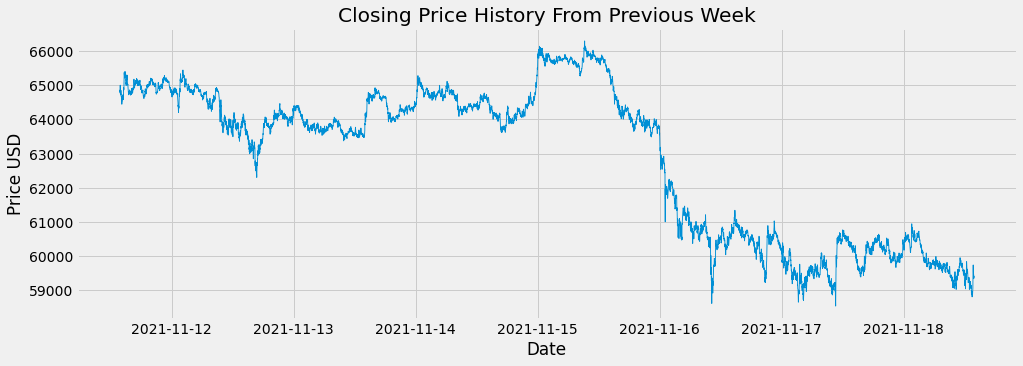

In [7]:
# plot prices
plt.figure(figsize=(15, 5))
plt.plot(crypto_df['Last'],label='closing price', linewidth = 0.9)
plt.title('Closing Price History From Previous Week')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()

## code machine larning: Linear regresion

In [8]:
# showing only BTC price
crypto_last_price_df = crypto_df[['Last']]
crypto_last_price_df.head(14)

,Last
Date and Time,
2021-11-11 07:49:00-06:00,64766.09
2021-11-11 07:50:00-06:00,64857.16
2021-11-11 07:51:00-06:00,64807.41
2021-11-11 07:52:00-06:00,64820.63
2021-11-11 07:53:00-06:00,64947.37
2021-11-11 07:54:00-06:00,65000.25
2021-11-11 07:55:00-06:00,64957.53
2021-11-11 07:56:00-06:00,64841.53
2021-11-11 07:57:00-06:00,64860.22


In [9]:
#  variable for predicting x number of periods into the future
predict_periods = 14 #numer of periods, then change this info to function

# create another column shifted n units up
crypto_last_price_df['Prediction'] = crypto_last_price_df[['Last']].shift(-predict_periods)

<ipython-input-9-ecb9c1ecbcbf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_last_price_df['Prediction'] = crypto_last_price_df[['Last']].shift(-predict_periods)


In [10]:
# show df with new column
crypto_last_price_df.head(14)

,Last,Prediction
Date and Time,,
2021-11-11 07:49:00-06:00,64766.09,64834.91
2021-11-11 07:50:00-06:00,64857.16,64830.11
2021-11-11 07:51:00-06:00,64807.41,64746.85
2021-11-11 07:52:00-06:00,64820.63,64732.77
2021-11-11 07:53:00-06:00,64947.37,64653.79
2021-11-11 07:54:00-06:00,65000.25,64670.00
2021-11-11 07:55:00-06:00,64957.53,64663.03
2021-11-11 07:56:00-06:00,64841.53,64654.99
2021-11-11 07:57:00-06:00,64860.22,64519.47


In [11]:
# show last 15 rows of new dataset
crypto_last_price_df.tail(15)

,Last,Prediction
Date and Time,,
2021-11-18 07:34:00-06:00,58996.06,59359.99
2021-11-18 07:35:00-06:00,59054.06,NaN
2021-11-18 07:36:00-06:00,59430.22,NaN
2021-11-18 07:37:00-06:00,59573.34,NaN
2021-11-18 07:38:00-06:00,59684.99,NaN
2021-11-18 07:39:00-06:00,59736.26,NaN
2021-11-18 07:40:00-06:00,59659.07,NaN
2021-11-18 07:41:00-06:00,59535.37,NaN
2021-11-18 07:42:00-06:00,59462.56,NaN


In [12]:
# create independent dataset, convert the dataframe to a np array and drop prediction column
a=np.array(crypto_last_price_df[['Last']])
#remove the last n rows where n is the prediction days
a=a[:-predict_periods]
print(a)

[[64766.09]
 [64857.16]
 [64807.41]
 ...
 [58919.81]
 [58975.02]
 [58996.06]]


In [13]:
# CREATE THE DEPENDENT DATA SET
#CONVERT THE DF TO A NP ARRAY
b = crypto_last_price_df['Prediction'].values

#get all values except las n rows
b = b[:-predict_periods]
print(b)

[64834.91 64830.11 64746.85 ... 59386.03 59415.32 59359.99]


In [14]:
# split the data into 85% traning and 15% testing
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.15, shuffle = False)

In [15]:
# create and train the model
Lreg = LinearRegression()
# train
Lreg.fit(a_train,b_train)


LinearRegression()

In [16]:
# test shows R^2 
Lreg_similarity = Lreg.score(a_test,b_test)
print('LIN REG SIMILARITY:', Lreg_similarity)

LIN REG SIMILARITY: 0.8101019963153107


In [17]:
# create variable a_projection and set equal to last 14 rows of original dataset
a_projection = np.array(crypto_last_price_df[['Last']])[-predict_periods:]
print(a_projection)

[[59054.06]
 [59430.22]
 [59573.34]
 [59684.99]
 [59736.26]
 [59659.07]
 [59535.37]
 [59462.56]
 [59475.  ]
 [59462.59]
 [59334.24]
 [59386.03]
 [59415.32]
 [59359.99]]


In [18]:
# print lreg models predictions for next 14 days
Lreg_predict = Lreg.predict(a_projection)
print(Lreg_predict)

[59064.88713219 59439.51421228 59582.05097244 59693.24597854
 59744.30704403 59667.43160722 59544.23570705 59471.72242094
 59484.1117257  59471.75229869 59343.92534811 59395.50429451
 59424.67493247 59369.57041221]


In [19]:
results_compare=zip(a_projection,Lreg_predict)
results_df= pd.DataFrame(results_compare, columns = ['actual price', 'predicted price'])
results_df

,actual price,predicted price
0,[59054.06],59064.887132
1,[59430.22],59439.514212
2,[59573.34],59582.050972
3,[59684.99],59693.245979
4,[59736.26],59744.307044
5,[59659.07],59667.431607
6,[59535.37],59544.235707
7,[59462.56],59471.722421
8,[59475.0],59484.111726
9,[59462.59],59471.752299


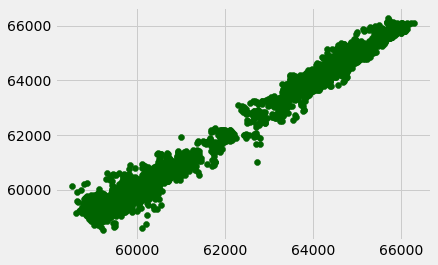

In [20]:
plt.scatter(a, b, color="DarkGreen" )

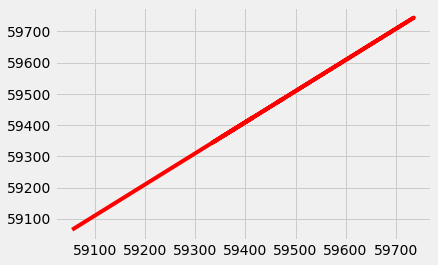

In [21]:
plt.plot(a_projection,Lreg_predict, color='r')

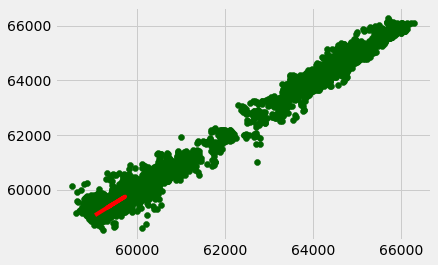

In [22]:
plt.scatter(a, b, color="DarkGreen" )
plt.plot(a_projection,Lreg_predict, color='r')
plt.show()

## MACD

In [23]:
#Create DF for MACD
crypto_MACD_df= crypto_df.copy(deep=True)
crypto_MACD_df.head()

,Open,High,Low,Last,Volume
Date and Time,,,,,
2021-11-11 07:49:00-06:00,64747.02,64782.09,64732.71,64766.09,11.39610
2021-11-11 07:50:00-06:00,64766.10,64885.42,64766.09,64857.16,23.81991
2021-11-11 07:51:00-06:00,64857.17,64879.83,64788.92,64807.41,20.88030
2021-11-11 07:52:00-06:00,64807.42,64845.05,64807.41,64820.63,21.17315
2021-11-11 07:53:00-06:00,64820.62,64970.40,64820.62,64947.37,61.84379


In [24]:
#Calculate MACD and signal line 
# short term EMA ewm=exponential weighted functions
crypto_MACD_df['S_EMA']=crypto_MACD_df.Last.ewm(span=12, adjust=False).mean()
#Long term EMA ewm=exponential weighted functions
crypto_MACD_df['L_EMA']=crypto_MACD_df.Last.ewm(span=26, adjust=False).mean()

#Calculate MACD line
crypto_MACD_df['MACD_line']=\
                          crypto_MACD_df.S_EMA-crypto_MACD_df.L_EMA

#calculate Signal Line
crypto_MACD_df['Sig_line']=\
                          crypto_MACD_df.MACD_line.ewm(span=9, adjust=False).mean()
crypto_MACD_df.head()

,Open,High,Low,Last,Volume,S_EMA,L_EMA,MACD_line,Sig_line
Date and Time,,,,,,,,,
2021-11-11 07:49:00-06:00,64747.02,64782.09,64732.71,64766.09,11.39610,64766.090000,64766.090000,0.000000,0.000000
2021-11-11 07:50:00-06:00,64766.10,64885.42,64766.09,64857.16,23.81991,64780.100769,64772.835926,7.264843,1.452969
2021-11-11 07:51:00-06:00,64857.17,64879.83,64788.92,64807.41,20.88030,64784.302189,64775.396968,8.905221,2.943419
2021-11-11 07:52:00-06:00,64807.42,64845.05,64807.41,64820.63,21.17315,64789.891083,64778.747563,11.143520,4.583439
2021-11-11 07:53:00-06:00,64820.62,64970.40,64820.62,64947.37,61.84379,64814.118609,64791.238114,22.880495,8.242850


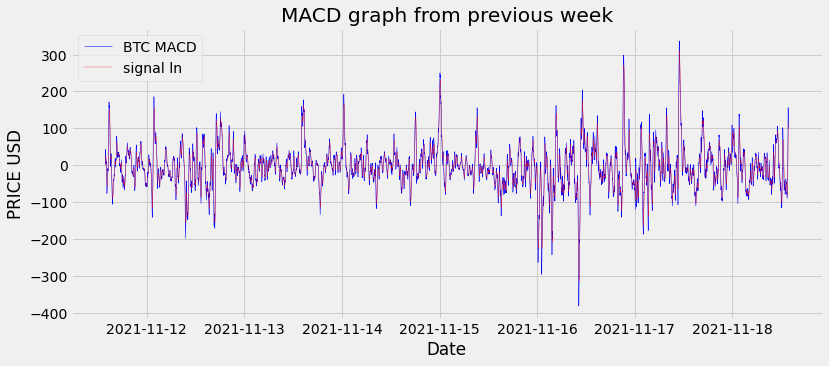

In [25]:
#chart from previous week
plt.figure(figsize=(12, 5))
plt.plot(crypto_MACD_df.MACD_line, label='BTC MACD', color='b',linewidth=0.5)
plt.plot(crypto_MACD_df.Sig_line, label='signal ln', color='r', linewidth=0.3)
plt.title('MACD graph from previous week')
plt.xlabel('Date')
plt.ylabel('PRICE USD')
plt.legend(loc='upper left')

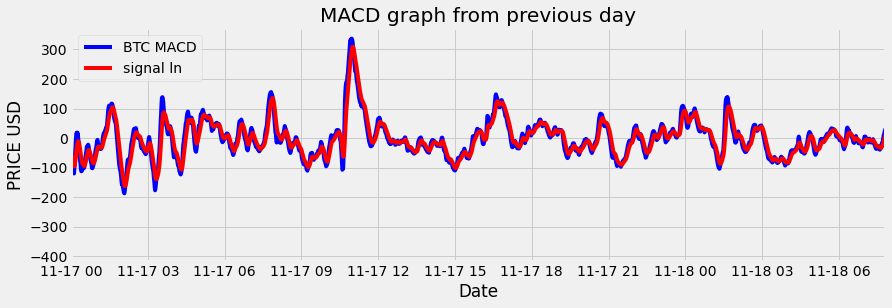

In [26]:
# plt chart from previous day 
now = datetime.now()
Previous_Date = date.today() - timedelta(days=1)
plt.figure(figsize=(13, 4))
plt.plot(crypto_MACD_df.MACD_line, label='BTC MACD', color='b')
plt.plot(crypto_MACD_df.Sig_line, label='signal ln', color='r')
plt.legend(loc='upper left')
plt.xlim([Previous_Date, now])
plt.title('MACD graph from previous day')
plt.xlabel('Date')
plt.ylabel('PRICE USD')
plt.show()

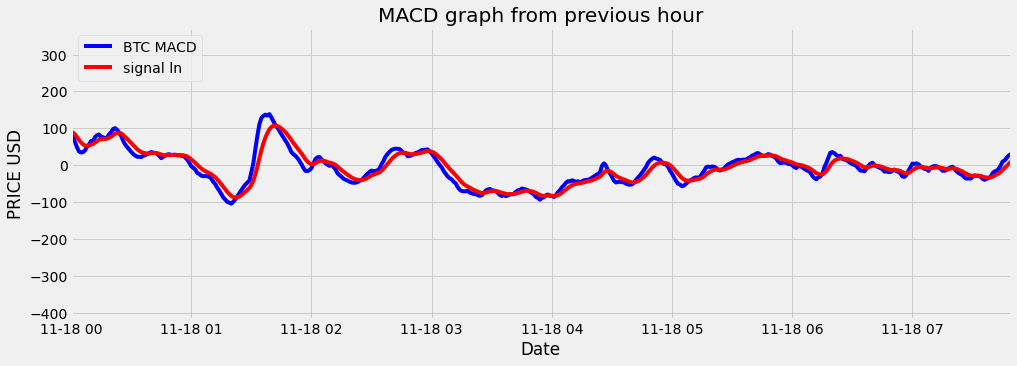

In [27]:
# plt chart from previous hour
now = datetime.now()
lastHour = date.today() - timedelta(hours = 1)
plt.figure(figsize=(15, 5))
plt.plot(crypto_MACD_df.MACD_line, label='BTC MACD', color='b')
plt.plot(crypto_MACD_df.Sig_line, label='signal ln', color='r')
plt.legend(loc='upper left')
plt.xlim([lastHour, now])
plt.title('MACD graph from previous hour')
plt.xlabel('Date')
plt.ylabel('PRICE USD')
plt.show()

In [28]:
#buy sell signal
def alert_MACD(signal):
    buy = []
    sell = []
    flag = -1
    for i in range(0,len(signal)):
        if signal['MACD_line'][i] > signal['Sig_line'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append('1')
                flag = 1
            else:
                buy.append(np.nan)
        elif signal['MACD_line'][i] < signal['Sig_line'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append('1')
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy,sell)
            

In [29]:
#create buy and sell columns in df
x=alert_MACD(crypto_MACD_df)
crypto_MACD_df['Buy Notification'] = x[0]
crypto_MACD_df['Sell Notification'] = x[1]

# show df
# crypto_MACD_df.head(10)
# create df with buy and sell info
crypto_MACD_BuySell_Sig_df = crypto_MACD_df[['Buy Notification', 'Sell Notification']]
crypto_MACD_BuySell_Sig_df.sort_index(ascending=False).head()

,Buy Notification,Sell Notification
Date and Time,,
2021-11-18 07:48:00-06:00,NaN,NaN
2021-11-18 07:47:00-06:00,NaN,1
2021-11-18 07:46:00-06:00,NaN,NaN
2021-11-18 07:45:00-06:00,NaN,NaN
2021-11-18 07:44:00-06:00,NaN,NaN


## BOLLINGER BANDS

In [30]:
crypto_BBand_df =crypto_df.copy(deep=True)
# calculate SMA, SD, UPPER BAN, LOWER BAND
#GET TIME PERIOD
period = 20

# calculate SMA
crypto_BBand_df['SMA']=crypto_BBand_df['Last'].rolling(window = period).mean()
#calculate std
crypto_BBand_df['STD']=crypto_BBand_df['Last'].rolling(window = period).std()
#calculate BB UP
crypto_BBand_df['BBand Upper']=crypto_BBand_df['SMA']+(crypto_BBand_df['STD']*2)
#calculate BB LOW
crypto_BBand_df['BBand Lower']=crypto_BBand_df['SMA']-(crypto_BBand_df['STD']*2)

crypto_BBand_df.head()

,Open,High,Low,Last,Volume,SMA,STD,BBand Upper,BBand Lower
Date and Time,,,,,,,,,
2021-11-11 07:49:00-06:00,64747.02,64782.09,64732.71,64766.09,11.39610,NaN,NaN,NaN,NaN
2021-11-11 07:50:00-06:00,64766.10,64885.42,64766.09,64857.16,23.81991,NaN,NaN,NaN,NaN
2021-11-11 07:51:00-06:00,64857.17,64879.83,64788.92,64807.41,20.88030,NaN,NaN,NaN,NaN
2021-11-11 07:52:00-06:00,64807.42,64845.05,64807.41,64820.63,21.17315,NaN,NaN,NaN,NaN
2021-11-11 07:53:00-06:00,64820.62,64970.40,64820.62,64947.37,61.84379,NaN,NaN,NaN,NaN


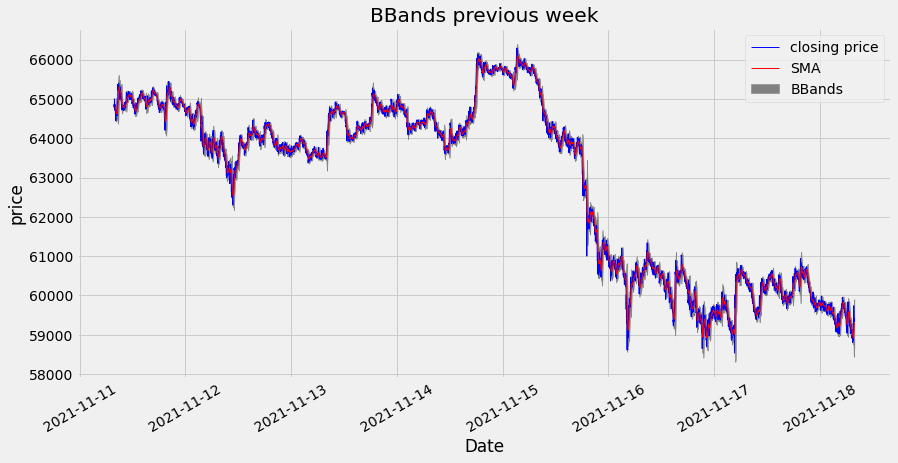

In [40]:
#list of colmns to keep
column_ls = ['Last','SMA', 'BBand Upper','BBand Lower']
#plot data
fig = plt.figure(figsize = (13,6))
ax=fig.add_subplot(1,1,1)
x_axis=crypto_BBand_df.index
ax.fill_between(x_axis,crypto_BBand_df['BBand Upper'], crypto_BBand_df['BBand Lower'],label='BBands', color='grey')
ax.plot(x_axis,crypto_BBand_df['Last'], color = 'b', label='closing price', linewidth=1)
ax.plot(x_axis,crypto_BBand_df['SMA'], color = 'r', label='SMA', linewidth=1)
ax.set_title('BBands previous week')
ax.set_xlabel('Date')
ax.set_ylabel('price')
plt.xticks(rotation=30)
ax.legend()
plt.show()

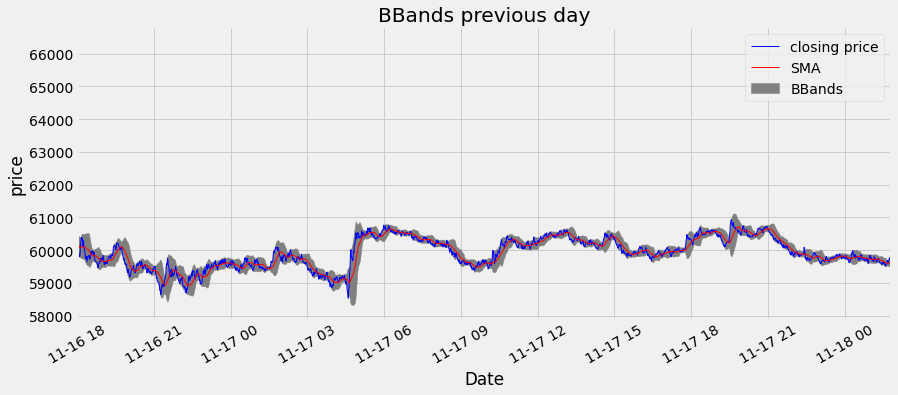

In [36]:
now = datetime.now()
Previous_Date = date.today() - timedelta(days=1)
#list of colmns to keep
column_ls = ['Last','SMA', 'BBand Upper','BBand Lower']
#plot data
fig = plt.figure(figsize = (13,5))
ax=fig.add_subplot(1,1,1)
x_axis=crypto_BBand_df.index
ax.fill_between(x_axis,crypto_BBand_df['BBand Upper'], crypto_BBand_df['BBand Lower'],label='BBands', color='grey')
ax.plot(x_axis,crypto_BBand_df['Last'], color = 'b', label='closing price', linewidth=1)
ax.plot(x_axis,crypto_BBand_df['SMA'], color = 'r', label='SMA', linewidth=1)
plt.xlim([Previous_Date,now])
ax.set_title('BBands previous day')
ax.set_xlabel('Date')
ax.set_ylabel('price')
plt.xticks(rotation=30)
ax.legend()
plt.show()


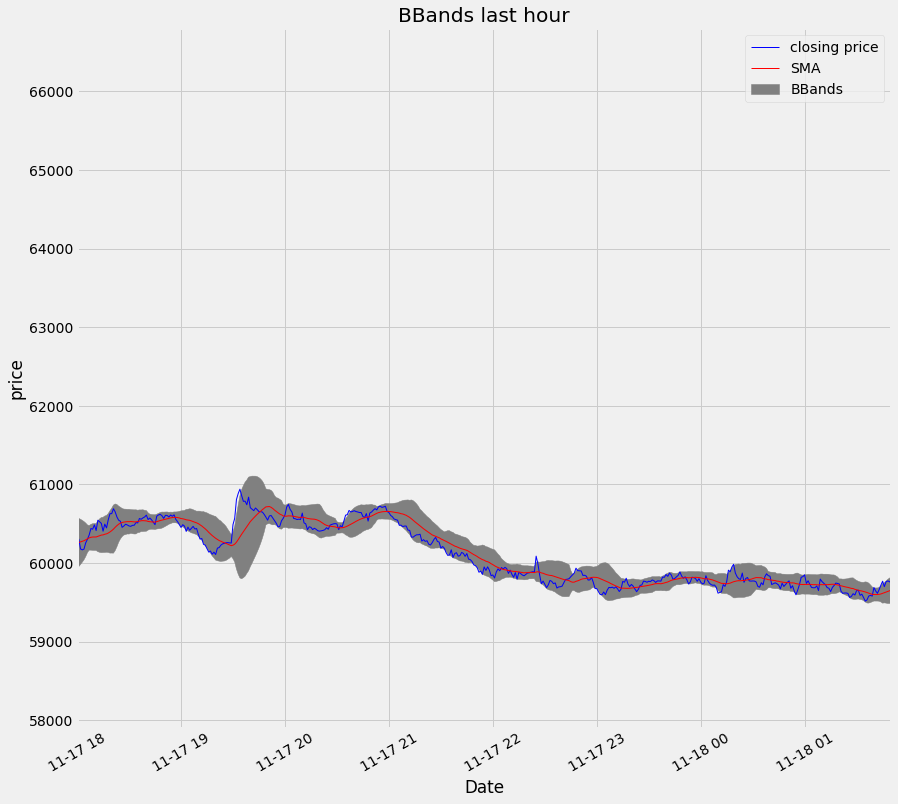

In [39]:
now = datetime.now()
lastHour = date.today() - timedelta(hours = 1)
#list of colmns to keep
column_ls = ['Last','SMA', 'BBand Upper','BBand Lower']
#plot data
fig = plt.figure(figsize = (13,12))
ax=fig.add_subplot(1,1,1)
x_axis=crypto_BBand_df.index
ax.fill_between(x_axis,crypto_BBand_df['BBand Upper'], crypto_BBand_df['BBand Lower'],label='BBands', color='grey')
ax.plot(x_axis,crypto_BBand_df['Last'], color = 'b', label='closing price', linewidth=1)
ax.plot(x_axis,crypto_BBand_df['SMA'], color = 'r', label='SMA', linewidth=1)
plt.xlim([lastHour,now])
ax.set_title('BBands ')
ax.set_xlabel('Date')
ax.set_ylabel('price')
plt.title('BBands last hour')
plt.xticks(rotation=30)
ax.legend()
plt.show()

In [34]:
#buy sell signal
def alert_BBands(signal):
    buy = []
    sell = []
    flag = -1
    for i in range(0,len(signal)):
        if signal['BB'][i] > signal['Sig_line'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(signal['Last'][i])
                flag = 1
            else:
                buy.append(np.nan)
        elif signal['MACD_line'][i] < signal['Sig_line'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(signal['Last'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy,sell)
            

In [35]:
#create buy and sell columns in df
x=alert_BBands(BTC_data_MACD_complete_df)
BTC_data_MACD_complete_df['Buy Notification'] = x[0]
BTC_data_MACD_complete_df['Sell Notification'] = x[1]

# show df
BTC_data_MACD_complete_df.head(10)
# create df with buy and sell info
BTC_MACD_BuySell_Sig_df = BTC_data_MACD_complete_df[['Date (GMT)',
                                                    'Buy Notification', 'Sell Notification']]
BTC_MACD_BuySell_Sig_df[:-1].head(10)

NameError: name 'BTC_data_MACD_complete_df' is not defined

In [ ]:
crypto_df['Last'].describe()

## Machine learning svr

In [47]:
def TI_graphs(df):
    #Create DF for MACD
    crypto_MACD_df= df.copy(deep=True)
    #Calculate MACD and signal line 
    # short term EMA ewm=exponential weighted functions
    crypto_MACD_df['S_EMA']=crypto_MACD_df.Last.ewm(span=12, adjust=False).mean()
    #Long term EMA ewm=exponential weighted functions
    crypto_MACD_df['L_EMA']=crypto_MACD_df.Last.ewm(span=26, adjust=False).mean()
    #Calculate MACD line
    crypto_MACD_df['MACD_line']=\
                              crypto_MACD_df.S_EMA-crypto_MACD_df.L_EMA
    #calculate Signal Line
    crypto_MACD_df['Sig_line']=\
                              crypto_MACD_df.MACD_line.ewm(span=9, adjust=False).mean()
    #chart from previous week
    plt.figure(figsize=(12, 5))
    plt.plot(crypto_MACD_df.MACD_line, label='BTC MACD', color='b',linewidth=0.5)
    plt.plot(crypto_MACD_df.Sig_line, label='signal ln', color='r', linewidth=0.3)
    plt.title('MACD graph from previous week')
    plt.xlabel('Date')
    plt.ylabel('PRICE USD')
    plt.legend(loc='upper left')
    
    # plt chart from previous day 
    now = datetime.now()
    Previous_Date = date.today() - timedelta(days=1)
    plt.figure(figsize=(13, 4))
    plt.plot(crypto_MACD_df.MACD_line, label='BTC MACD', color='b')
    plt.plot(crypto_MACD_df.Sig_line, label='signal ln', color='r')
    plt.legend(loc='upper left')
    plt.xlim([Previous_Date, now])
    plt.title('MACD graph from previous day')
    plt.xlabel('Date')
    plt.ylabel('PRICE USD')
    plt.show()
    
    # plt chart from previous hour
    now = datetime.now()
    lastHour = date.today() - timedelta(hours = 1)
    plt.figure(figsize=(15, 5))
    plt.plot(crypto_MACD_df.MACD_line, label='BTC MACD', color='b')
    plt.plot(crypto_MACD_df.Sig_line, label='signal ln', color='r')
    plt.legend(loc='upper left')
    plt.xlim([lastHour, now])
    plt.title('MACD graph from previous hour')
    plt.xlabel('Date')
    plt.ylabel('PRICE USD')
    plt.show()
   ####################################################################################
    crypto_BBand_df=df.copy(deep=True)
    # calculate SMA, SD, UPPER BAN, LOWER BAND
    #GET TIME PERIOD
    period = 20 

    # calculate SMA
    crypto_BBand_df['SMA']=crypto_BBand_df['Last'].rolling(window = period).mean()
    #calculate std
    crypto_BBand_df['STD']=crypto_BBand_df['Last'].rolling(window = period).std()
    #calculate BB UP
    crypto_BBand_df['BBand Upper']=crypto_BBand_df['SMA']+(crypto_BBand_df['STD']*2)
    #calculate BB LOW
    crypto_BBand_df['BBand Lower']=crypto_BBand_df['SMA']-(crypto_BBand_df['STD']*2)

    #list of colmns to keep
    column_ls = ['Last','SMA', 'BBand Upper','BBand Lower']
    #plot data PREVIOUS WEEK
    fig = plt.figure(figsize = (13,6))
    ax=fig.add_subplot(1,1,1)
    x_axis=crypto_BBand_df.index
    ax.fill_between(x_axis,crypto_BBand_df['BBand Upper'], crypto_BBand_df['BBand Lower'],label='BBands', color='grey')
    ax.plot(x_axis,crypto_BBand_df['Last'], color = 'b', label='closing price', linewidth=1)
    ax.plot(x_axis,crypto_BBand_df['SMA'], color = 'r', label='SMA', linewidth=1)
    ax.set_title('BBands previous week')
    ax.set_xlabel('Date')
    ax.set_ylabel('price')
    plt.xticks(rotation=30)
    ax.legend()
    plt.show()

    now = datetime.now()
    Previous_Date = date.today() - timedelta(days=1)
    #list of colmns to keep
    column_ls = ['Last','SMA', 'BBand Upper','BBand Lower']
    #plot data PREVIOUS DAY
    fig = plt.figure(figsize = (13,5))
    ax=fig.add_subplot(1,1,1)
    x_axis=crypto_BBand_df.index
    ax.fill_between(x_axis,crypto_BBand_df['BBand Upper'], crypto_BBand_df['BBand Lower'],label='BBands', color='grey')
    ax.plot(x_axis,crypto_BBand_df['Last'], color = 'b', label='closing price', linewidth=1)
    ax.plot(x_axis,crypto_BBand_df['SMA'], color = 'r', label='SMA', linewidth=1)
    plt.xlim([Previous_Date,now])
    ax.set_title('BBands previous day')
    ax.set_xlabel('Date')
    ax.set_ylabel('price')
    plt.xticks(rotation=30)
    ax.legend()
    plt.show()

    now = datetime.now()
    lastHour = date.today() - timedelta(hours = 1)
    #list of colmns to keep
    column_ls = ['Last','SMA', 'BBand Upper','BBand Lower']
    #plot data PREVIOUS HOUR
    fig = plt.figure(figsize = (13,12))
    ax=fig.add_subplot(1,1,1)
    x_axis=crypto_BBand_df.index
    ax.fill_between(x_axis,crypto_BBand_df['BBand Upper'], crypto_BBand_df['BBand Lower'],label='BBands', color='grey')
    ax.plot(x_axis,crypto_BBand_df['Last'], color = 'b', label='closing price', linewidth=1)
    ax.plot(x_axis,crypto_BBand_df['SMA'], color = 'r', label='SMA', linewidth=1)
    plt.xlim([lastHour,now])
    ax.set_title('BBands ')
    ax.set_xlabel('Date')
    ax.set_ylabel('price')
    plt.title('BBands last hour')
    plt.xticks(rotation=30)
    ax.legend()
    plt.show()
    

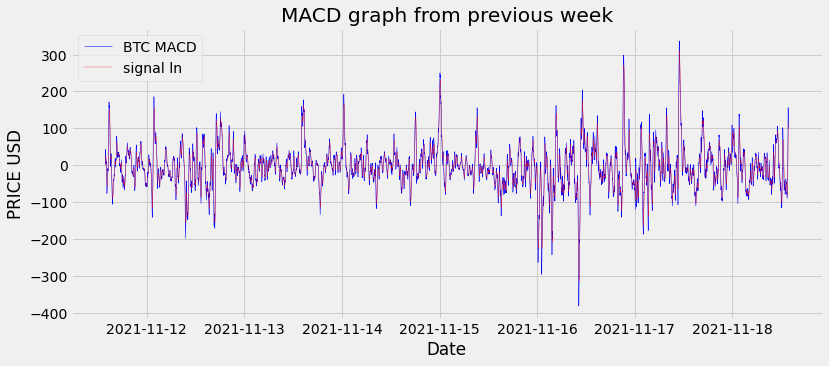

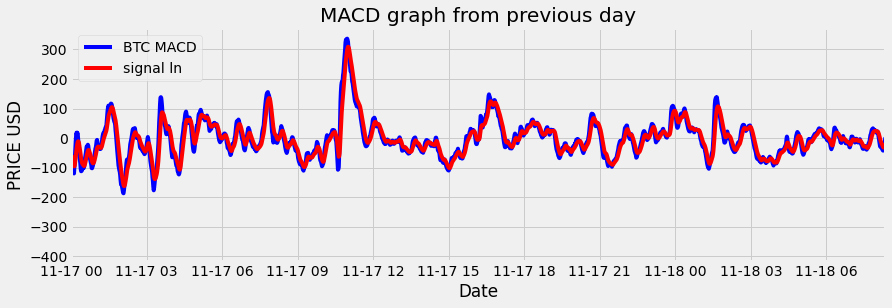

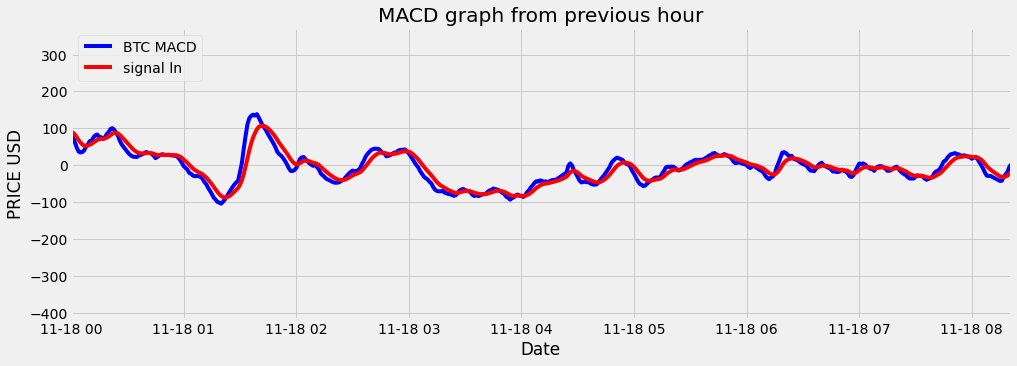

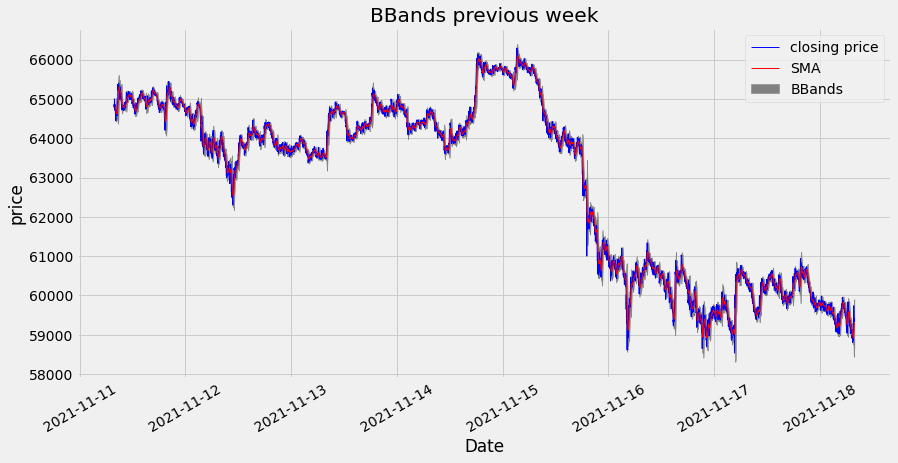

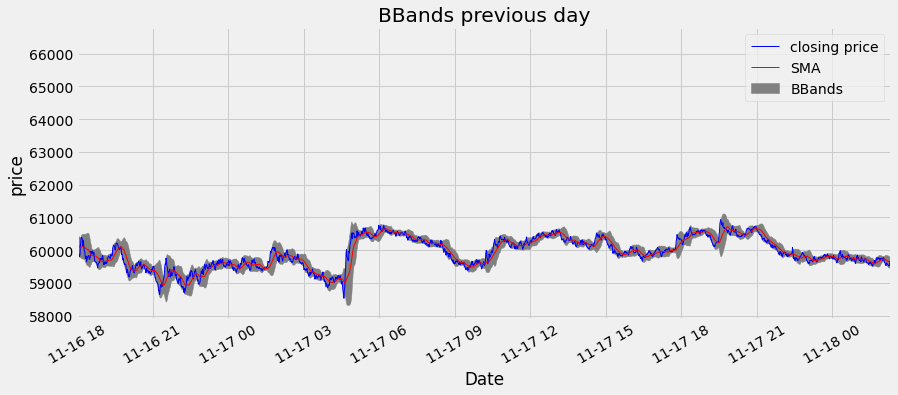

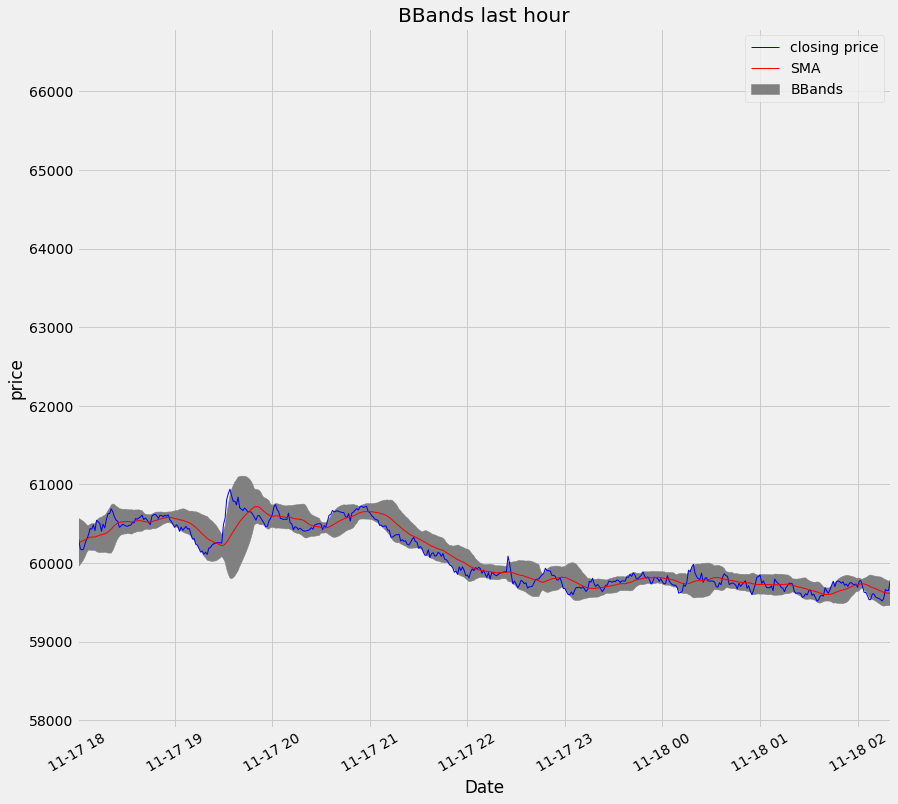

In [48]:
TI_graphs(crypto_df)